# Desafio Frexco

Estruture um script no Python que calcule a previsão de demanda para os próximos 5 dias do item, baseando-se no histórico presente na base de dados em anexo.


In [51]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
from statsmodels.tsa.arima.model import ARIMA

In [65]:
# Puxar base de dados

base = pd.read_excel('Dados.xlsx')


# transformar data em index

base = pd.read_excel('Dados.xlsx', parse_dates=['Data'], index_col='Data')


# exibir a tabela

#base.info()
base

,Vendas
Data,
2022-12-06,870
2022-12-07,868
2022-12-08,1189
2022-12-09,742
2022-12-10,317
2022-12-11,685
2022-12-12,1366
2022-12-13,1213
2022-12-14,1055


<AxesSubplot:xlabel='Data'>

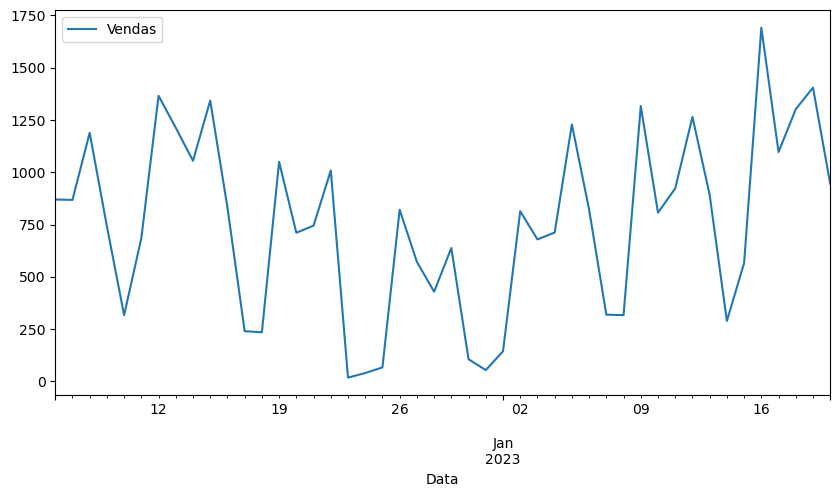

In [66]:
# analise 
'''
def plot_mediamovel(timeseries):
    
 
    rolmean = timeseries.rolling(2).mean()
    
    plt.figure(figsize=(10,5))
    orig = plt.plot(timeseries, color='blue',label='Vendas')
    mean = plt.plot(rolmean, color='red',label='Média')
    plt.legend(loc='best')
    plt.title('MÉDIA')
    plt.show(block=False)

plot_mediamovel(base)
'''
base.plot(figsize=(10,5))

In [67]:
# IA

mod = ARIMA(base["Vendas"], order=(1,0,1))
mod_fit = mod.fit()

# previsão | Para prever mais dias, basta alterar o steps para a qtd de dias desejada.

predict = mod_fit.forecast(steps=5)
print("Previsão para os próximos 5 dias:\n\n",predict)

Previsão para os próximos 5 dias:

 2023-01-21    831.709980
2023-01-22    727.664425
2023-01-23    767.249060
2023-01-24    752.188894
2023-01-25    757.918607
Freq: D, Name: predicted_mean, dtype: float64


# Considerações

Podemos ver uma queda recente nas vendas conforme o gráfico e média móvel, assim através da IA temos a seguinte previsão para os próximos 5 dias:

21/01/2023    831.709980

22/01/2023    727.664425

23/01/2023    767.249060

24/01/2023    752.188894

25/01/2023    757.918607